In [1]:
# import ML tools
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# import plotting tools
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


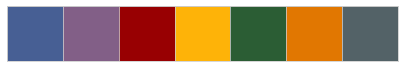

In [3]:
# import custom palette
import my_palette as mp

In [4]:
# read in actor dataset and actor name key data
df = pd.read_json('capstone1_ds.json')
names_df = pd.read_json('names.json')
df.transpose()

,2,3,4,5,6,10,12,13,14,18,...,2342129,2342141,2356351,2364949,2364960,2364963,2414049,2530891,2550091,2562896
actor_value,6.771807,1.517763,0.726447,6.797869,0.092847,0.053415,0.385437,0.721246,2.356295,0.018303,...,0.006893,0.018737,0.000238,3.911337,0.000178,1.4389,0.00092,0.000172,0.18408,0.024913
gender,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.0000,0.00000,1.000000,0.00000,0.000000
age,48.000000,54.000000,42.000000,60.000000,51.000000,45.000000,10.000000,57.000000,52.000000,49.000000,...,67.000000,64.000000,50.000000,24.000000,19.000000,24.0000,40.00000,46.000000,18.00000,1.000000
runtime,115.000000,120.000000,115.000000,100.000000,135.000000,95.000000,95.000000,110.000000,100.000000,95.000000,...,100.000000,100.000000,100.000000,90.000000,90.000000,90.0000,120.00000,95.000000,115.00000,115.000000
rating,70.000000,67.000000,68.000000,70.000000,72.000000,77.000000,70.000000,68.000000,73.000000,66.000000,...,64.000000,64.000000,67.000000,65.000000,65.000000,65.0000,71.00000,64.000000,64.00000,64.000000
action,9.000000,18.000000,6.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,1.00000,1.000000
adventure,8.000000,16.000000,6.000000,1.000000,9.000000,1.000000,1.000000,3.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,1.000000,0.00000,0.000000
animation,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,5.000000,2.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.00000,0.000000
comedy,1.000000,8.000000,7.000000,1.000000,0.000000,2.000000,1.000000,6.000000,1.000000,10.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.00000,0.000000,0.00000,0.000000
crime,3.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,1.00000,1.000000


This dataset only contains actors from 1st to 10th billing order

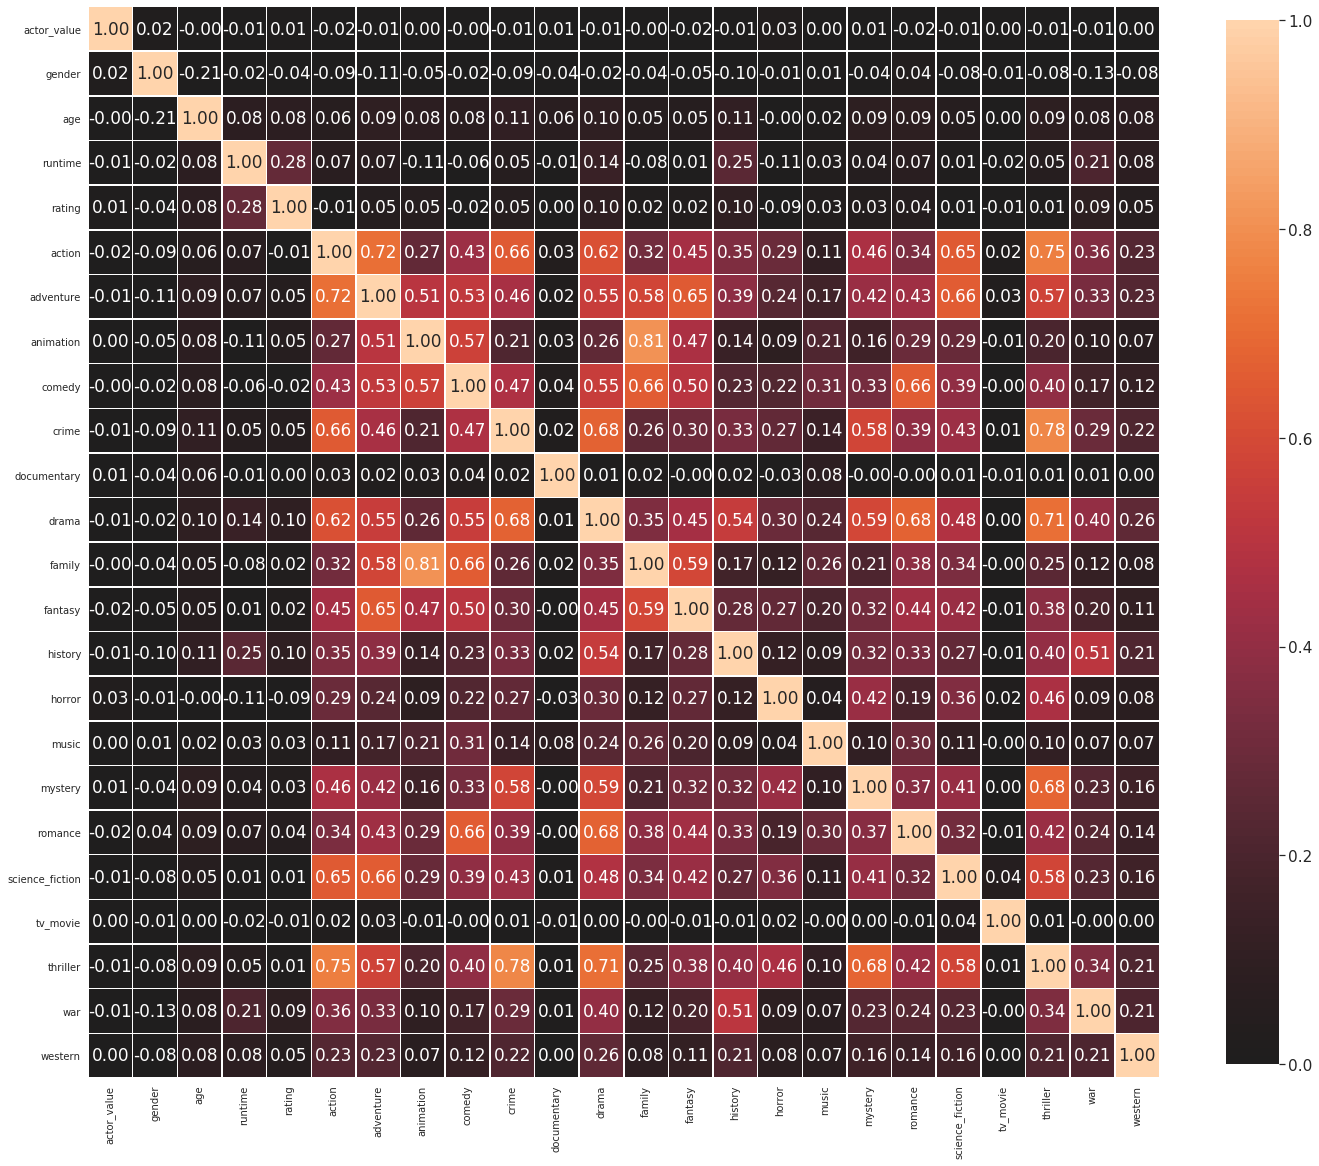

In [102]:
# plot heatmap of correlations
fig, ax = plt.subplots(figsize=(24,24))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), vmin=0, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, 
            annot=True, cbar_kws={"shrink": .80});

Full Target

In [5]:
X = df.drop('actor_value', axis=1)
y = df['actor_value']

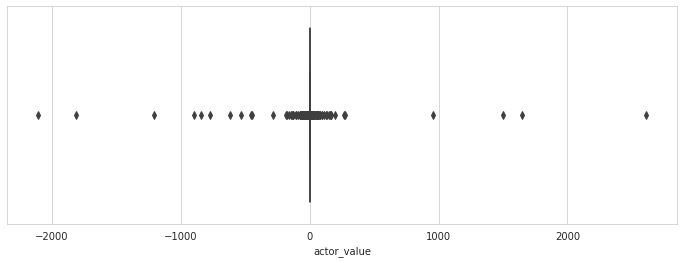

In [67]:
sns.boxplot(df['actor_value']);

Look for outliers

In [68]:
q1 = np.percentile(df["actor_value"], 25)
q3 = np.percentile(df["actor_value"], 75)
iqr = q3 - q1
iqr

0.0484673253

In [69]:
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
lower, upper

(-0.07295670705, 0.12091259415)

In [70]:
# number of outlier observations according to iqr
df[(df["actor_value"]>upper) | (df["actor_value"]<lower)].shape[0]

4410

In [71]:
df.shape[0]

15129

In [72]:
z = (df["actor_value"] - np.mean(df["actor_value"])) / np.std(df["actor_value"])
# number of outlier observations according to z-score
(np.absolute(z) > 2.5).sum()

33

In [73]:
min(df["actor_value"]), max(df["actor_value"])

(-2109.7773930898, 2612.251451965)

OLS-Full Target

In [6]:
mod_ols = sm.OLS(y, X)

In [7]:
results = mod_ols.fit()

In [8]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            actor_value   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              2.025
Date:                Sun, 14 Jun 2020   Prob (F-statistic):                     0.00256
Time:                        10:16:10   Log-Likelihood:                         -77783.
No. Observations:               15129   AIC:                                  1.556e+05
Df Residuals:                   15106   BIC:                                  1.558e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

RFR-Full Target

In [20]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [52]:
# First create the base model to tune
base_model = RandomForestRegressor(random_state=27)
# Fit the random search model
base_model.fit(X_train, y_train)
base_model.score(X_test, y_test)

-0.14445220412479842

In [39]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [53]:
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 4.5499 degrees.
Accuracy = -inf%.


In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=27, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.3min finished


{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [45]:
best_random = rf_random.best_estimator_

In [46]:
best_random.score(X_train, y_train)

0.4240164494569635

In [55]:
best_y_pred = best_random.predict(X_test)

In [48]:
np.sqrt(mean_squared_error(y_test, best_y_pred))

43.48004828566329

In [49]:
r2_score(y_test, best_y_pred)

0.03321738756663761

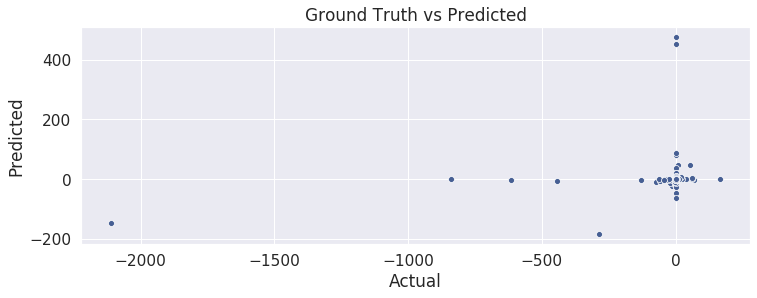

In [130]:
sns.scatterplot(y_test, best_y_pred, edgecolors=(0, 0, 0))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Ground Truth vs Predicted");

In [43]:
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 3.4241 degrees.
Accuracy = -inf%.


In [44]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of nan%.


/home/lord_black/anaconda3/envs/movieCap1/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


Positive Target Values

In [76]:
pos_df = df[df['actor_value'] > 0]

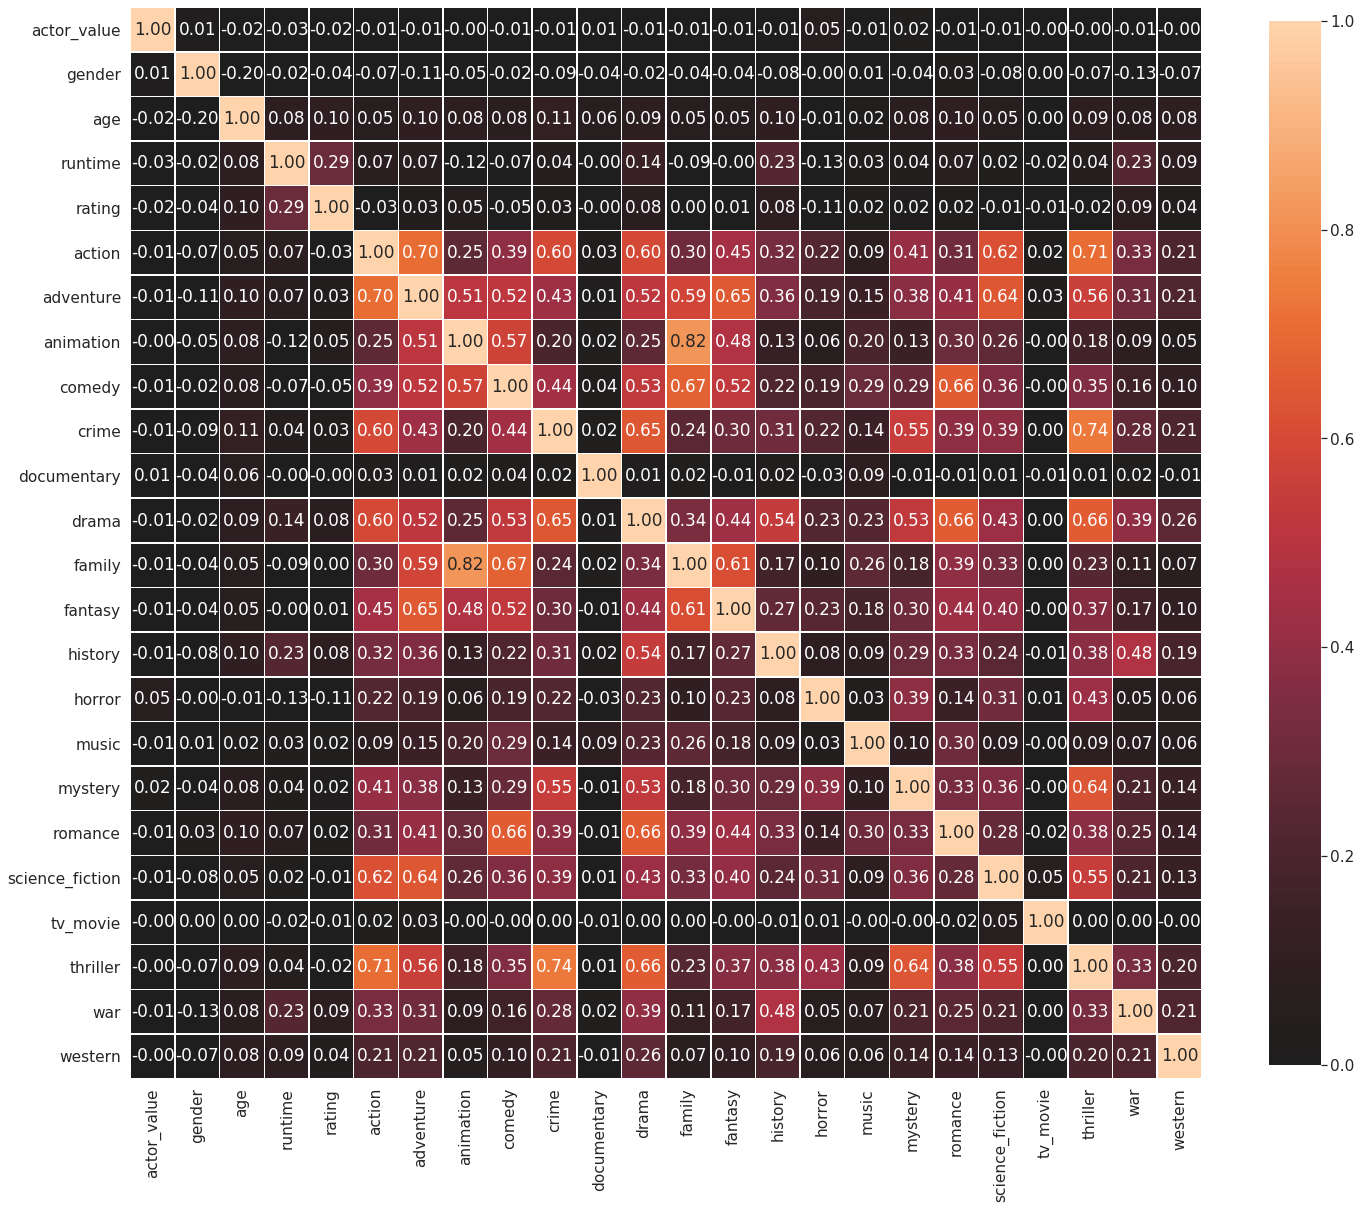

In [103]:
# plot heatmap of correlations
fig, ax = plt.subplots(figsize=(24,24))

sns.set(font_scale=1.4)
sns.heatmap(pos_df.corr(), vmin=0, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, 
            annot=True, cbar_kws={"shrink": .80});

In [89]:
# observe strange correlation between actor value and rating
df[df['actor_value'] == 0]

,actor_value,gender,age,runtime,rating,action,adventure,animation,comedy,crime,...,history,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western
6554,0.0,0,33,105,64,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7278,0.0,0,40,105,64,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19360,0.0,1,33,105,64,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20980,0.0,1,47,90,64,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21908,0.0,0,28,95,64,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788123,0.0,1,26,110,64,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1960247,0.0,1,37,115,64,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2264602,0.0,1,30,125,64,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2264603,0.0,1,28,125,64,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df[df['actor_value'] == 0]['rating'].value_counts()

64    65
63     2
Name: rating, dtype: int64

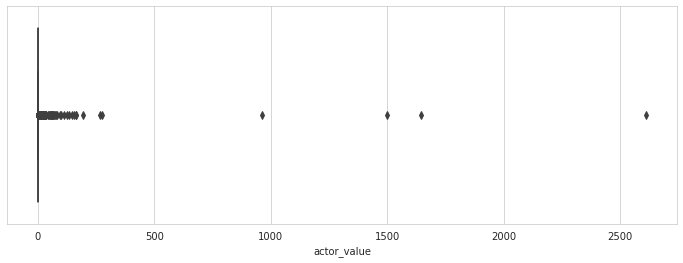

In [78]:
sns.boxplot(pos_df['actor_value']);

In [79]:
X_pos = pos_df.drop('actor_value', axis=1)
y_pos = pos_df['actor_value']

In [80]:
pos_mod_ols = sm.OLS(y_pos, X_pos)

In [81]:
pos_results = pos_mod_ols.fit()

In [111]:
print(pos_results.summary())

                                 OLS Regression Results                                
Dep. Variable:            actor_value   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              2.989
Date:                Sun, 14 Jun 2020   Prob (F-statistic):                    2.00e-06
Time:                        23:11:13   Log-Likelihood:                         -52552.
No. Observations:               10553   AIC:                                  1.052e+05
Df Residuals:                   10530   BIC:                                  1.053e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

RFR-Positive Target

In [90]:
# split data
X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X_pos, y_pos, test_size=0.2, random_state=27)

In [91]:
# First create the base model to tune
pos_base_model = RandomForestRegressor(random_state=27)
# Fit the random search model
pos_base_model.fit(X_pos_train, y_pos_train)
pos_base_model.score(X_pos_test, y_pos_test)

-1.5891507483680254

In [93]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
pos_rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
pos_rf_random = RandomizedSearchCV(estimator = pos_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=27, n_jobs = -1)
# Fit the random search model
pos_rf_random.fit(X_pos_train, y_pos_train)
pos_rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished


{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [94]:
pos_best_random = pos_rf_random.best_estimator_

In [95]:
pos_best_random.score(X_pos_train, y_pos_train)

0.21023737872419268

In [96]:
best_y_pos_pred = pos_best_random.predict(X_pos_test)

In [97]:
np.sqrt(mean_squared_error(y_pos_test, best_y_pos_pred))

19.111718498658828

In [98]:
r2_score(y_pos_test, best_y_pos_pred)

0.19885664444801499

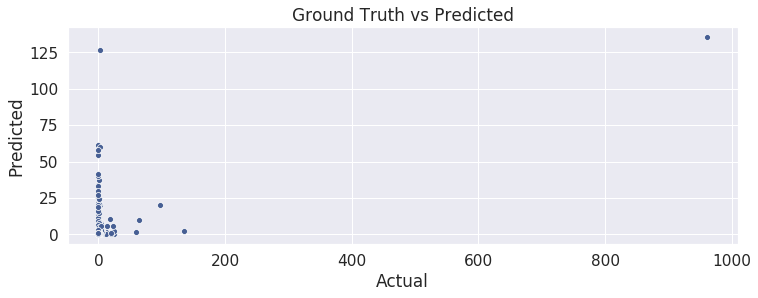

In [129]:
sns.scatterplot(y_pos_test, best_y_pos_pred, edgecolors=(0, 0, 0))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Ground Truth vs Predicted");

Drop outliers > 2.5 z-score

In [104]:
# drop outliers
no_out_df = df.drop(index=df.loc[np.absolute(
    np.divide(
        np.subtract(
            df["actor_value"], np.mean(df["actor_value"])), np.std(df["actor_value"]))) > 2.5].index)

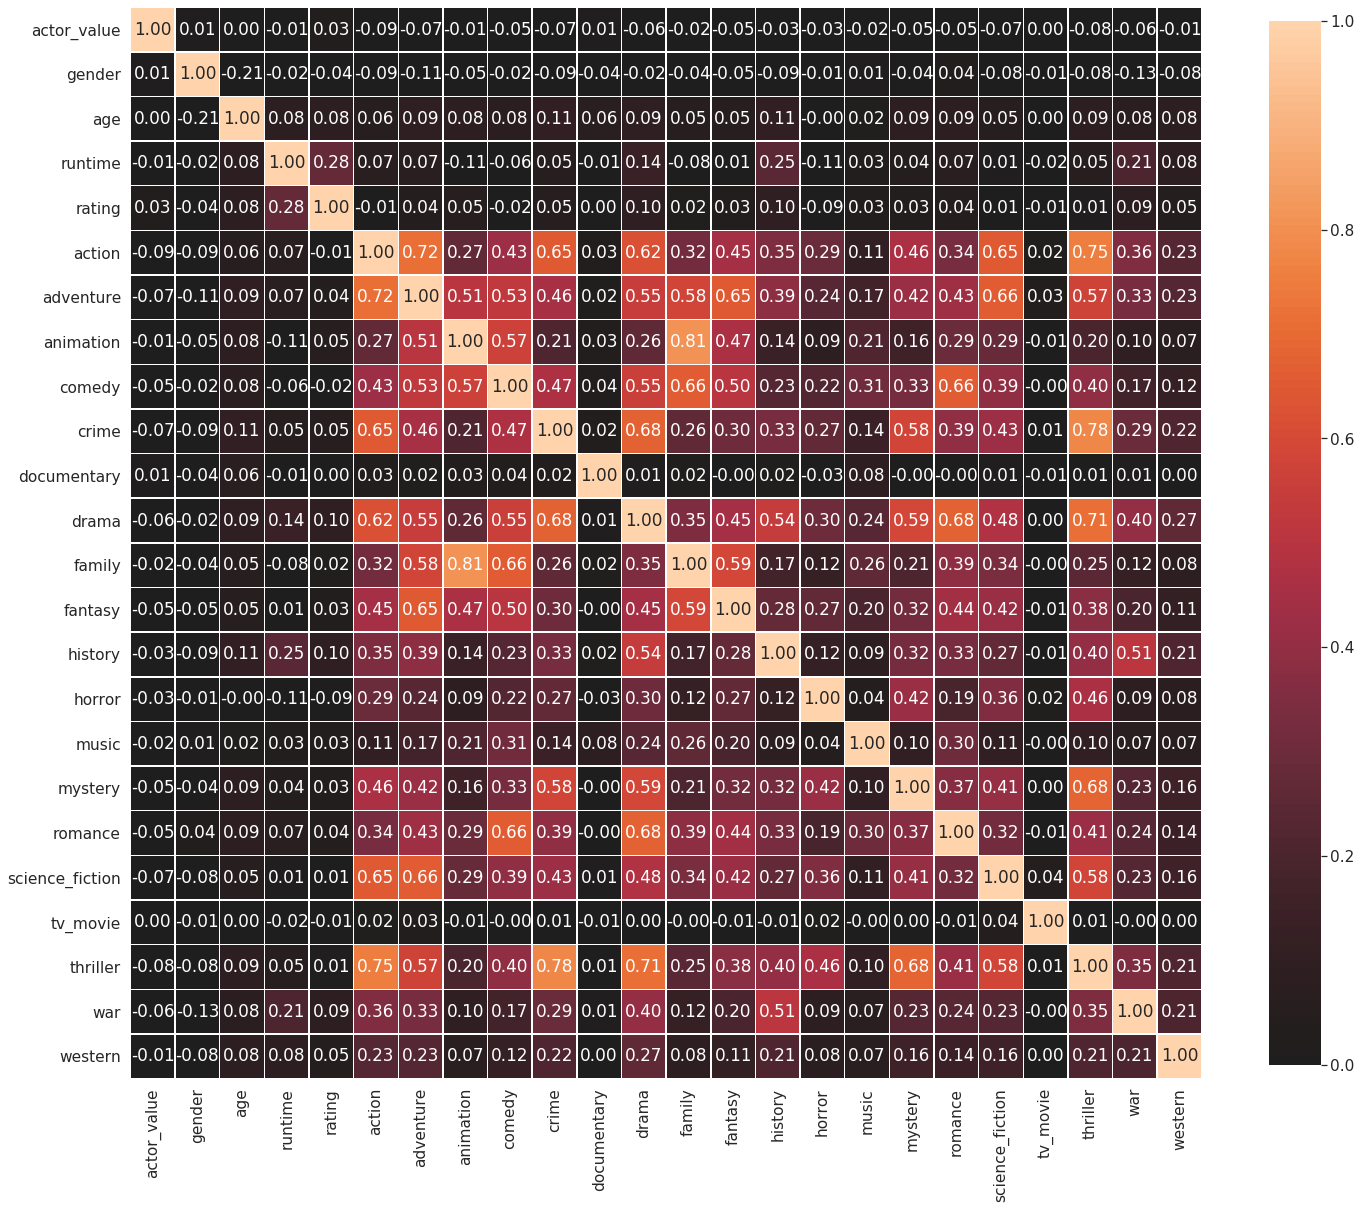

In [112]:
# plot heatmap of correlations
fig, ax = plt.subplots(figsize=(24,24))

sns.set(font_scale=1.4)
sns.heatmap(no_out_df.corr(), vmin=0, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, 
            annot=True, cbar_kws={"shrink": .80});

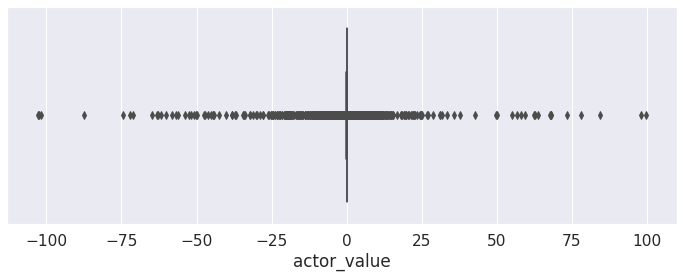

In [113]:
sns.boxplot(no_out_df['actor_value']);

In [131]:
min(no_out_df["actor_value"]), max(no_out_df["actor_value"])

(-102.8912558676, 99.7516049704)

In [105]:
X_no_out = no_out_df.drop('actor_value', axis=1)
y_no_out = no_out_df['actor_value']

OLS drop outliers

In [106]:
no_out_mod_ols = sm.OLS(y_no_out, X_no_out)

In [109]:
no_out_results = no_out_mod_ols.fit()

In [110]:
print(no_out_results.summary())

                                 OLS Regression Results                                
Dep. Variable:            actor_value   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              7.600
Date:                Sun, 14 Jun 2020   Prob (F-statistic):                    3.79e-25
Time:                        23:10:55   Log-Likelihood:                         -43666.
No. Observations:               15096   AIC:                                  8.738e+04
Df Residuals:                   15073   BIC:                                  8.755e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

RFR-No Outliers Target

In [114]:
# split data
X_no_out_train, X_no_out_test, y_no_out_train, y_no_out_test = train_test_split(X_no_out, y_no_out, test_size=0.2, random_state=27)

In [115]:
# First create the base model to tune
no_out_base_model = RandomForestRegressor(random_state=27)
# Fit the random search model
no_out_base_model.fit(X_no_out_train, y_no_out_train)
no_out_base_model.score(X_no_out_test, y_no_out_test)

-0.28872707566267275

In [117]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
no_out_rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
no_out_rf_random = RandomizedSearchCV(estimator = no_out_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=27, n_jobs = -1)
# Fit the random search model
no_out_rf_random.fit(X_no_out_train, y_no_out_train)
no_out_rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.6min finished


{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [118]:
no_out_best_random = no_out_rf_random.best_estimator_

In [119]:
no_out_best_random.score(X_no_out_train, y_no_out_train)

0.24525813752746095

In [120]:
best_y_no_out_pred = no_out_best_random.predict(X_no_out_test)

In [121]:
np.sqrt(mean_squared_error(y_no_out_test, best_y_no_out_pred))

3.4562518088147782

In [122]:
r2_score(y_no_out_test, best_y_no_out_pred)

0.01798517762597751

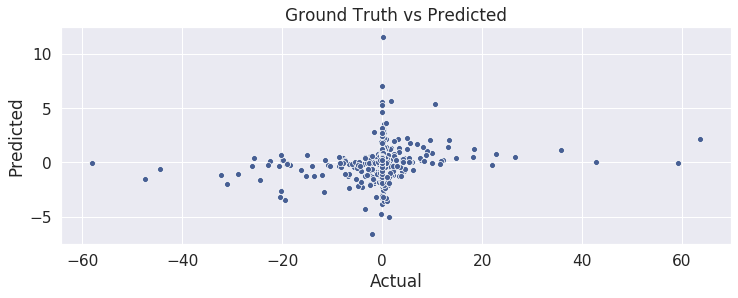

In [128]:
sns.scatterplot(y_no_out_test, best_y_no_out_pred, edgecolors=(0, 0, 0))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Ground Truth vs Predicted");

In [126]:
no_out_residuals = y_no_out_test - best_y_no_out_pred

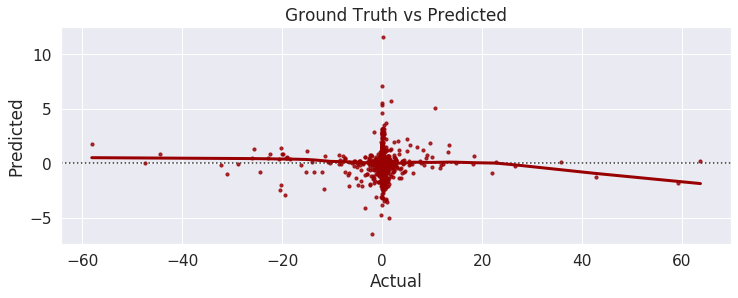

In [125]:
sns.residplot(y_no_out_test, best_y_no_out_pred, lowess=True, scatter_kws={'s':10}, 
              color=mp.colors(2), line_kws={'linewidth':3})
#sns.lineplot([y_no_out_test.min(), y_no_out_test.max()], [y_no_out_test.min(), y_no_out_test.max()], markers='--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Ground Truth vs Predicted");

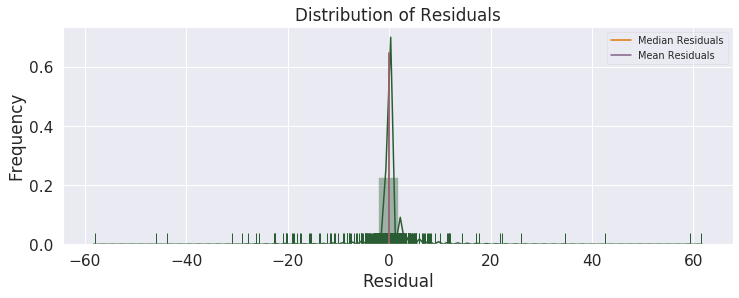

In [127]:
sns.distplot(no_out_residuals, bins=30, rug=True, axlabel='Residual', color=mp.colors(4))
plt.axvline(np.median(no_out_residuals), ymin=0, ymax=0.88, label='Median Residuals', color=mp.colors(5))
plt.axvline(np.mean(no_out_residuals), ymin=0, ymax=0.88, label='Mean Residuals', color=mp.colors(1))

plt.ylabel('Frequency')

plt.legend(loc=1, fontsize='xx-small', framealpha=0.3)
plt.title('Distribution of Residuals');